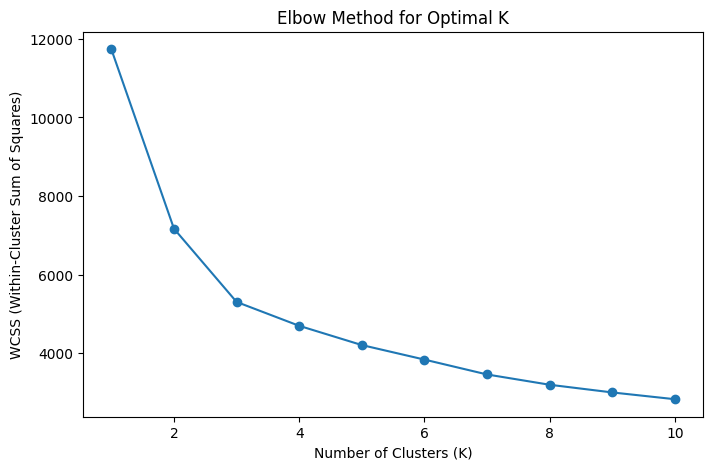

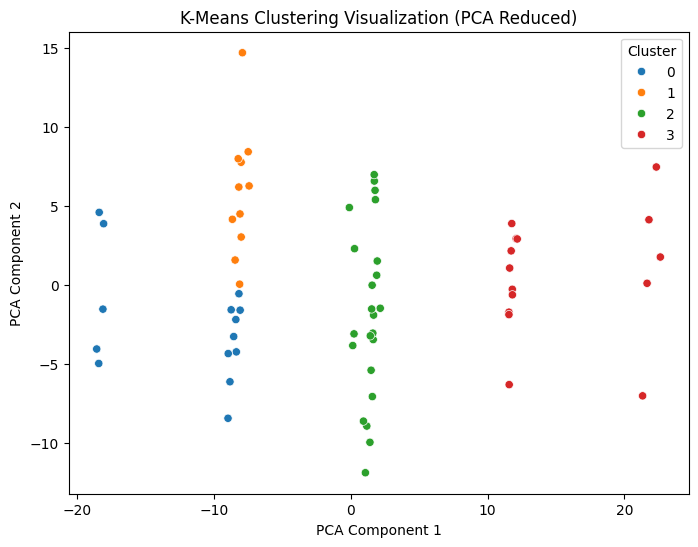

Cluster Summary:
               Age      Units  Academic_Hours  Academic_Satisfication  \
Cluster                                                                 
0        21.071429  13.071429             0.0                6.071429   
1        20.818182  17.545455             0.0                4.909091   
2        21.652174  14.086957             0.0                6.956522   
3        21.400000  15.733333             0.0                6.333333   

         Academic_Stress  Job_Club_Satisfaction  Job_Club_Stress  Sleep_Hours  \
Cluster                                                                         
0               6.571429               6.642857         4.000000     6.714286   
1               8.545455               6.636364         6.000000     6.818182   
2               7.434783               5.739130         4.913043     7.173913   
3               8.266667               6.333333         4.333333     6.533333   

         Active_Level  Diet_Level  ...  Excitement_freq  

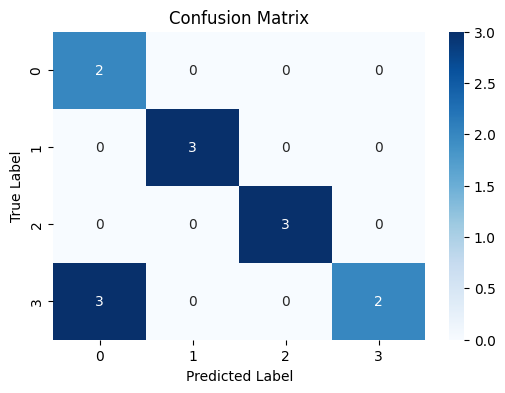

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the newly provided CSV file
df = pd.read_csv('updated_responses.csv')

# Mapping academic hours to numerical values
hours_mapping = {
    "Less than 10 Hours": 5,
    "10-20 Hours": 15,
    "21-30 Hours": 25,
    "31-40 Hours": 35,
    "41-50 Hours": 45,
    "51-60 Hours": 55,
    "More than 60 Hours": 65
}
df["Academic_Hours"] = df["Academic_Hours"].map(hours_mapping)

# Selecting numerical columns for clustering
numerical_df = df.select_dtypes(include=[np.number]).drop(columns=["Unnamed: 0"], errors='ignore')

# Ensuring no NaN values exist before clustering
numerical_df = numerical_df.fillna(0)

# Finding the optimal number of clusters using the Elbow Method
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(numerical_df)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker="o", linestyle="-")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()

# Applying K-Means clustering with K=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
numerical_df["Cluster"] = kmeans.fit_predict(numerical_df)

# Reducing dimensions for visualization
pca = PCA(n_components=2, random_state=42)
numerical_df["PCA1"] = pca.fit_transform(numerical_df.drop(columns=["Cluster"]))[:, 0]
numerical_df["PCA2"] = pca.fit_transform(numerical_df.drop(columns=["Cluster"]))[:, 1]

# Scatter plot of clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue=numerical_df["Cluster"], palette="tab10", data=numerical_df)
plt.title("K-Means Clustering Visualization (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

# Summarizing the characteristics of each cluster
cluster_summary = numerical_df.groupby("Cluster").mean()
print("Cluster Summary:")
print(cluster_summary)

# Naive Bayes Classification
X = numerical_df.drop(columns=["Cluster"])
y = numerical_df["Cluster"]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predictions
y_pred = nb_model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(4), yticklabels=range(4))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
